### 머신러닝
- 데이터를 기반으로 학습
- 과거 컴퓨터로 데이터 입력, 특징을 학습 패턴을 찾는 패턴인식

#### 식에 필요한 요소
- 무언가(x)로 무엇(y)를 예측하고 싶다

     $$ f(x) = y $$
     - x : 독립변수(입력변수), 데이터 문제
     - y : 종속변수(출력변수), 정답
     - f : 머신러닝 모형(모델)

- 우리는 이때까지 f를 직접 코딩했음. X값들 입력하면 y가 나오도록 개발
- 머신러닝/딥러닝 x, y를 다 입력해서 훈련을 시켜 함수 f를 컴퓨터가 만들도록 하는 것

#### 데이터셋 분리
- 훈련을 시켜서 독립변수에 대한 종속변수가 도출되는 모델 만들 수 있음
- 100% 훈련에 사용하면 검증을 할 데이터 없음
- Training으로 훈련 후 Test데이터로 실험, 또는 Train데이터로 훈련, Valid데이터 검증 후, Test데이터 실험

- 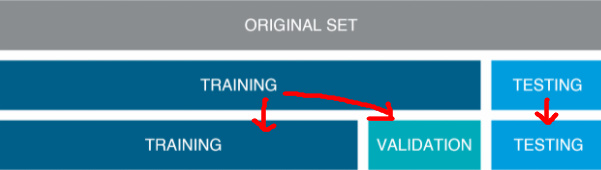

- 100%에서 Train과 Test 나눌때 7:3 또는 8:2로 비율을 나눔

#### 사이킷런으로 타이타닉 생존자 예측
- 선형회귀 : 선형회귀에 대한 정의는 결론을 본 뒤 설명

- 사이킷런 설치
```python
!pip install scikit-learn
```


In [7]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 9.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 10.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.0 MB 10.9 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.0 MB 11.2 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/11.0 MB 11.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.0 MB 11.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.0 MB 11.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.3/11.0 MB 11.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/11.0 MB 11.4 MB/s eta 0:00:


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# 분석, 시각화 라이브러리 사용
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, rc, font_manager
import warnings
import seaborn as sns
import time
from tqdm import tqdm  # 반복 진행 프로그레스바 모듈

In [2]:
warnings.simplefilter('ignore') # 경고메시지 출력숨김

plt.rcParams['font.size'] = 12 # 글자크기
plt.rcParams['figure.figsize'] = (12, 6) # (W, H)
plt.rcParams['axes.grid'] = True # 차트 가로세로줄 표시

sns.set_theme(style='darkgrid', color_codes=True)
# 영어라도 이 작업은 해야함

In [3]:
# 시본 팔레트 설정용 함수

def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

https://github.com/datasciencedojo/datasets/blob/master/titanic.csv 에서 통합 데이터 다운로드

In [4]:
# 사이킷런 임포트
from sklearn import preprocessing

##### 데이터 로드
- 타이타닉 데이터
- https://www.kaggle.com/competitions/titanic/data 캐글사이트에서 다운로드

In [5]:
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
## Seaborn 891개 데이터만 존재. 불필요한 중복컬럼 많음
## https://github.com/mwaskom/seaborn-data 나머지 여기
df_titanic = sns.load_dataset('titanic') ## tatanic.csv
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- 데이터 컬럼 정의
    1. PassengerId : 탑증자 데이터 일련번호
    2. Survived : 생존여부 0사망 1생존
    3. Pclass : 티켓의 선실 등급 1일등석실, 2이등석실, 3삼등석실
    4. Name : 탑승자 명
    5. Sex : 성별 male남성, female여성
    6. Age : 나이
    7. SibSp : Sibling(형제), Spouse(배우자) 동반 형제와 배우자 수
    8. Parch Parent, Child 동반한 부모 또는 자녀 인원 수
    9. Ticket : 티켓번호
    10. Fare : 티켓요금
    11. Cabin : 선실번호
    12. Embarked : 탑승 항구코드 C.herbourg, Q.ueenstown, S.outhhampton

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 데이터
    - 총 891개, 12개 컬럼, 2개의 float64, 5개 object(=string), 5개 int64

- 결측치(Null값)
    - Age 177개
    - Cabin 687개
    - Embarked 2개

##### 데이터 전처리

- Age의 결측치 - 나이의 빈값은 평균치 입력
- Cabin의 결측치 - 2등석, 3등석 결측치 분포, 재검토
- Embarked의 결측치 - 탑승항구가 세군데. 그 중에 가장 사람들이 많이 탄곳에서 탔을거다

In [10]:
# Age의 결측치
## 나이의 평균 29.69... -> 30
round(df_train['Age'].mean()) # round() 반올림인듯
df_train['Age'].fillna(round(df_train['Age'].mean()), inplace=True) # null 부분 평균인 30으로 다 채운거

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df_train[df_train['Embarked'].isna()] # Embarked가 null인 행 출력, 61 829 행

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
## Embarked
## value_counts() 결과는 max부터 내림차순으로 나오기때문에
# df_train['Embarked'].value_counts().max()
# df_train['Embarked'].value_counts().index[0] # S
df_train['Embarked'].fillna(df_train['Embarked'].value_counts().index[0], inplace=True) # Null부분을 제일 많은 S로 대체

In [14]:
df_train.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                         S
Name: 61, dtype: object

In [15]:
df_train.loc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [16]:
## Cabin 결측치는 컬럼을 삭제
df_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [17]:
# axis - 0행삭제, 1열삭제
df_train.drop(['Cabin'], axis=1, inplace=True) # Nan이 너무 많다. 그냥 열 하나 빼버려

In [33]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [18]:
## 성별, 생존자수 파악
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

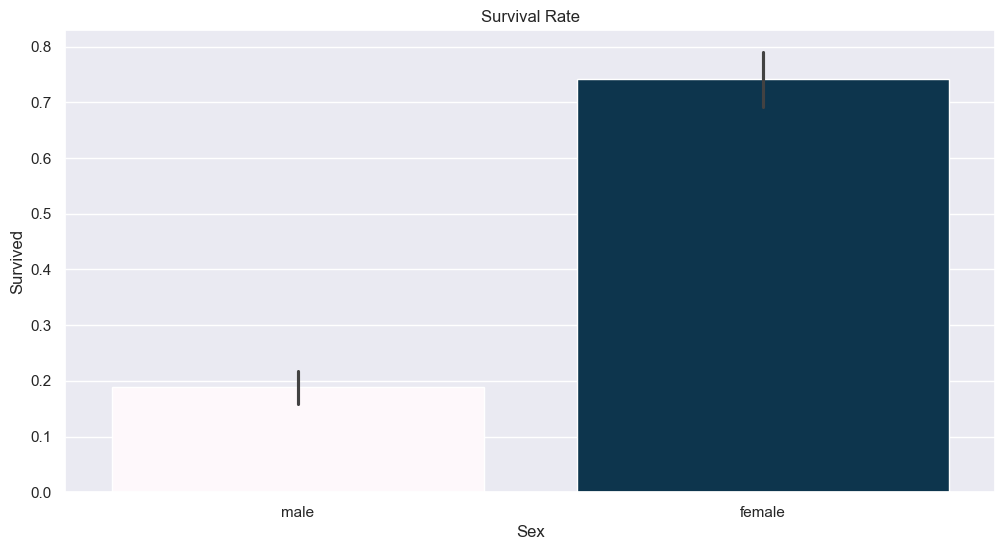

In [19]:
## Seaborn으로 시각화
sns.barplot(data=df_train, x='Sex', y='Survived', palette=colors_from_values(df_train['Survived'], 'PuBu'))
plt.title('Survival Rate')
plt.show()

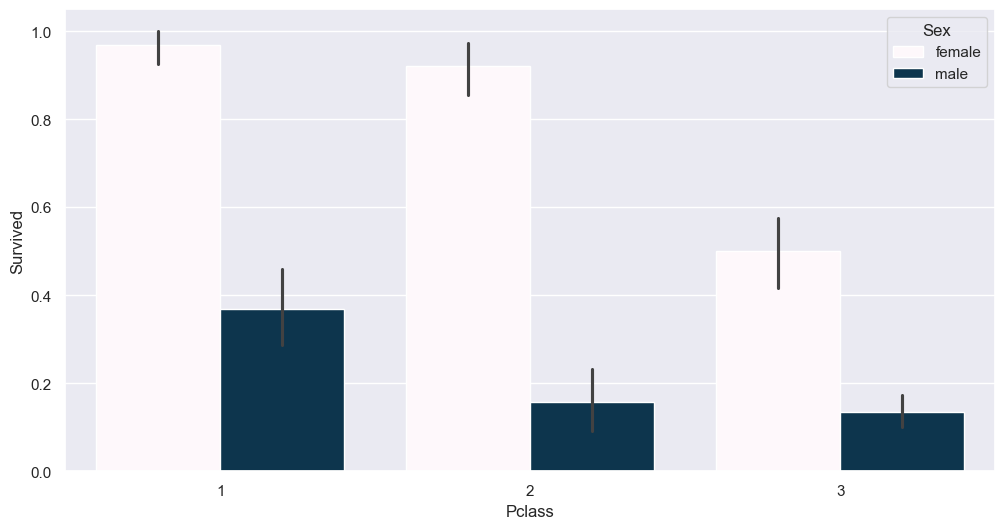

In [20]:
sns.barplot(data=df_train, x='Pclass', y='Survived', hue='Sex', palette=colors_from_values(df_train['Survived'], 'PuBu'))
plt.show()

In [21]:
## 나이대로 통계
def get_ageGroup(age):
    cate = ''
    if age <= 5: cate = 'Baby'
    elif age <= 12: cate = 'Child'
    elif age <= 18: cate = 'Teenager'
    elif age <= 25: cate = 'Student'
    elif age <= 35: cate = 'Young Adult'
    elif age <= 60: cate = 'Adult'
    else: cate = 'Elderly'

    return cate

In [22]:
group_name = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

In [23]:
df_train['AgeGroup'] = df_train['Age'].apply(lambda x: get_ageGroup(x))

In [24]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.45,S,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,Young Adult
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,Young Adult


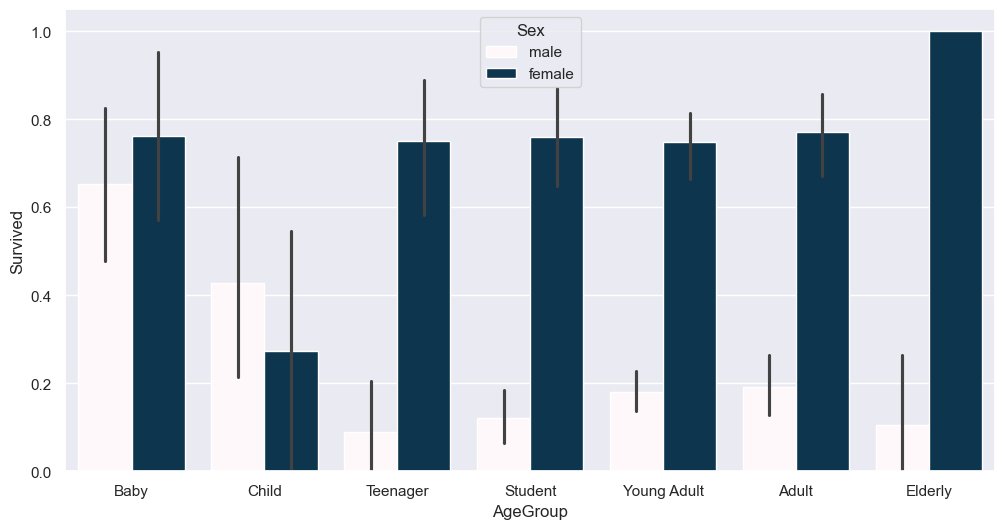

In [25]:
## 연령대로 바차트
sns.barplot(data=df_train, x='AgeGroup', y='Survived', hue='Sex', palette=colors_from_values(df_train['Survived'], 'PuBu'), order=group_name)
plt.show()

##### 문자열을 숫자로
- 문자(열)로 된 컬럼(Name, Ticket), 카테고리 컬럼(Sex, Embarked) 중 카테고리는 문자를 숫자로 변환가능
- 사이킷런 LabelEncoder클래스 사용

In [26]:
def encode_features(df):
    features = ['Sex', 'Embarked']
    for feat in features: # 두개의 컬럼을 반복해서
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feat]) # Sex, Embarked 컬럼값을 입력받아서 자동으로 카테고리 숫자화
        df[feat] = le.transform(df[feat]) # 기존값과 카테고리 숫자를 비교해서 숫자로 변경

    return df # 아마 알파벳순으로 0,1,2 나누는듯

In [27]:
# 이전값 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


In [28]:
df_train = encode_features(df_train)

In [29]:
df_train.head() # 성별 0,1로 바뀜

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,Young Adult


##### 머신러닝으로 생존자 예측

- 독립변수(x) - 입력값(x) 과 종속변수(y) - 정답으로 분리
- 독립변수 - Survived를 뺀 나머지. 훈련에 의미가 없을 컬럼(변수)도 삭제
- 종속변수 - Survived(생존여부)
- PassengerID와 같은 의미없는 변수를 추가하면 정확도가 떨어짐

In [285]:
## 종속변수 추출
y_df_titanic = df_train['Survived']
y_df_titanic # 시리즈

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [84]:
# 독립변수 추출
X_df_titanic = df_train.drop(['PassengerId', 'Name', 'Ticket', 'AgeGroup', 'Survived'], axis=1)
X_df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.9 KB


In [85]:
## 데이터분리 891
## 캐글 데이터는 훈련용 891, 실험용 418개 따로 분리
## Seaborn 등에서는 891개의 데이터를 7:3으로 Train:Test 분리 작업을 해왔음
## 이거 없었으면 개발자가 다 섞고 할당하고 이 짓을 해야함
from sklearn.model_selection import train_test_split

In [86]:
## 초기에 모두 섞은다음, 해당하는 독립변수와 종속변수를 알아서 할당
## random_state는 본인마음. 0~41 사이의 숫자를 지정하면 됨
X_train, X_test, y_train, y_test = train_test_split(X_df_titanic, y_df_titanic, test_size=0.2, random_state=13)

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 711 to 338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int32  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 38.9 KB


In [88]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 712 entries, 711 to 338
Series name: Survived
Non-Null Count  Dtype
--------------  -----
712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [89]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 736 to 815
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int32  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 9.8 KB


In [90]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 179 entries, 736 to 815
Series name: Survived
Non-Null Count  Dtype
--------------  -----
179 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


##### 사이킷런의 머신러닝 모델

In [91]:
from sklearn.linear_model import LinearRegression ## ML 선형회귀
from sklearn.linear_model import LogisticRegression ## ML 로지스틱회귀
from sklearn.tree import DecisionTreeClassifier ## ML 결정트리 
from sklearn.ensemble import RandomForestClassifier ## ML 랜덤포레스트 분류

from sklearn.metrics import accuracy_score ## 정확도 점수

In [92]:
## 선형회귀 모델
lir_model = LinearRegression()
lir_model

LinearRegression()

In [93]:
## 훈련시작
lir_model.fit(X_train, y_train)

LinearRegression()

In [94]:
## 예측(실험) - 예측할 때는 정답을 안넣음
dt_pred = lir_model.predict(X_test)

In [95]:
y_test_fl = y_test.astype('float64')

In [96]:
dt_pred

array([ 0.43414145,  0.1907687 ,  0.07871113,  0.13425581,  0.10964025,
        0.77996799,  0.09708059,  0.14683416,  0.13398818,  0.62843573,
        0.08399403,  0.43693494,  0.842081  ,  0.09659551,  0.10904253,
        0.77609638,  0.99513552,  0.30787212,  0.03395405,  0.11679561,
        0.12426183,  0.61111917,  0.1340891 ,  0.15324222,  0.02110372,
        0.69529491,  0.11538342,  0.09642824,  0.03745369,  0.27073844,
        0.74925153,  0.5442769 ,  0.54589921,  0.10870828,  0.15303036,
        0.2505173 ,  0.15302895,  0.05334786,  0.52362466,  0.66406302,
        0.43542953,  0.59060816,  0.12224201,  0.29392298,  0.12797598,
        0.6537306 ,  0.13831668,  0.00867788,  0.0504144 ,  0.09654393,
        0.09650351,  0.94834348,  0.75007836,  0.5100211 ,  0.14683416,
        0.86869044,  0.0316671 ,  0.23879398,  0.46651853,  0.46565368,
        0.69285517,  0.50703281,  0.13792171,  0.63093404,  0.13424885,
        0.26307696,  0.70668252,  0.79563644,  0.42697069,  0.80

In [ ]:
### 학습하고 예측한 결과 평가
## 테스트 값과 예측값을 같이 넣어서 둘 사이 비교. 정확도 얼마나 되는지
accuracy_score(y_test, dt_pred)
## 생존은 0아님 1이기 때문에 이거 못쓴다. 점들 막~ 찍히고 선 그어주는 있잖아. 이게 그건데 0아님1이면 안되겠지

In [97]:
## 로지스틱 모델 생성
lgr_model = LogisticRegression()
lgr_model

LogisticRegression()

In [98]:
# 훈련시작
lgr_model.fit(X_train, y_train)

LogisticRegression()

In [99]:
## 예측
lgr_pred = lgr_model.predict(X_test)

In [100]:
lgr_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [101]:
### 로지스틱 회귀 예측값 평가
accuracy_score(y_true=y_test, y_pred=lgr_pred)

0.8324022346368715

In [102]:
pd.Series(lgr_pred)

0      0
1      0
2      0
3      0
4      0
      ..
174    0
175    1
176    0
177    1
178    0
Length: 179, dtype: int64

#### 결론
- 머신러닝 기본에 회귀
- 측정된 값들로 규칙을 찾아내는 것

- 선형회귀 : 측정값을 참조하면 직선의 함수가 도출됨
    - 선형회귀는 1차 방정식

<img src="https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png?20080104184121" width="700">

- 로지스틱회귀 : 종속변수가 두 개의 클래스로 가지는 범주형일때 붐류기법으로 사용하는 회귀
    - 로지스틱회귀는 시그모이드 함수

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png" width="700"
    style="background:white">

##### 파이토치로 생존자 예측

- 딥러닝을 사용해서 생존자 예측

In [104]:
## 파이토치 진행
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [105]:
## train과 test 데이터를 df_train, df_test
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [108]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [109]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


##### 데이터 전처리

- 불필요한 변수 삭제 - Name, Ticket, Cabin 삭제

In [110]:
df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [111]:
df_train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,male,27.0,0,0,13.00,S
887,888,1,1,female,19.0,0,0,30.00,S
888,889,0,3,female,NaN,1,2,23.45,S
889,890,1,1,male,26.0,0,0,30.00,C
890,891,0,3,male,32.0,0,0,7.75,Q


In [112]:
df_test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S
417,1309,3,male,NaN,1,1,22.3583,C


- 성별, 승선항구 인코딩(문자 -> 숫자)

In [113]:
df_train = encode_features(df_train)
df_test = encode_features(df_test)

In [114]:
df_train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,1,27.0,0,0,13.00,2
887,888,1,1,0,19.0,0,0,30.00,2
888,889,0,3,0,NaN,1,2,23.45,2
889,890,1,1,1,26.0,0,0,30.00,0
890,891,0,3,1,32.0,0,0,7.75,1


In [115]:
df_test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,1305,3,1,NaN,0,0,8.0500,2
414,1306,1,0,39.0,0,0,108.9000,0
415,1307,3,1,38.5,0,0,7.2500,2
416,1308,3,1,NaN,0,0,8.0500,2
417,1309,3,1,NaN,1,1,22.3583,0


- 결측치 처리
    - 나이, 선임(배타는 돈)의 NaN을 채워야함. 중간값이나 평균으로 채워넣음

In [118]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [119]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [120]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


##### 파이토치 학습 모델
- 신경망 생성

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/330px-Neural_network_example.svg.png" width="200" style="background:white">

- 신경망, 사람의 뇌의 뉴런과 유사하게 네트워크 구성
    - 입력층(input layer), 은닉층(hidden layer), 출력층(output layer)
    - 은닉층이 하나지만 실제로 딥러닝을 할때 은닉층을 여러층으로 나눠서 반복 학습을 진행
    - 은닉층이 많아지면 처리속도가 급감. 이때 활용하는 것이 GPU(CUDA) 

- 모델링

- 활성화 함수 : 입력을 변환하는(출력값을 결정하는) 비선형 함수
    - sign 함수
    - Sigmoid 함수
    - Tanh 함수
    - Softmax 함수
    - ReLU(Recified Linear Unit)함수

    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/ReLU_and_Nonnegative_Soft_Thresholding_Functions.svg/1920px-ReLU_and_Nonnegative_Soft_Thresholding_Functions.svg.png" width="700" style="background:white">

In [224]:
## 은닉층 2개, 2개 뉴런을 가지는 출력층 1개

class NeuralNet(nn.Module): ## nn.Module이 부모클래스
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hlayer1 = nn.Sequential(
            nn.Linear(8, 512), # 8개의 입력을 512개로 분산(경우의 수 늘리는 것)
            nn.ReLU(), ## 활성화 함수, 로지스틱회귀에 떴던 스그모이드보다 오차가 줄어들게 만들 수 있는 활성함수로 개발, 유명하다. 이거 생긴이래로 딥러닝 역사가 바꼈대. 
            nn.Dropout(0.2) # Overfitting 방지
        )

        self.hlayer2 = nn.Sequential(
            nn.Linear(512, 512), ## hlayer1의 출력이 512니까 입력도 512개 되어야 함
            nn.LeakyReLU(),
            nn.Dropout(0.2)
        )

        self.olayer = nn.Linear(512, 2)

    def forward(self, x):
        x = self.hlayer1(x)
        x = self.hlayer2(x)
        x = self.olayer(x)
        return x

In [225]:
nn_model = NeuralNet()
nn_model

NeuralNet(
  (hlayer1): Sequential(
    (0): Linear(in_features=8, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (hlayer2): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.2, inplace=False)
  )
  (olayer): Linear(in_features=512, out_features=2, bias=True)
)

##### 스케일러
- 원본 데이터는 영향을 크게 미치는 변수(feature)와 영향을 미치지 못하는 변수 존재 > 패턴 찾기 어렵고, 학습 능력도 저하
- 표준스케일러(StandardScalar)를 사용, 데이터를 스케일링
- 기존 변수의 범위를 정규분포로 변환

In [226]:
df_train.tail(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
888,889,0,3,0,29.699118,1,2,23.45,2
889,890,1,1,1,26.000000,0,0,30.00,0
890,891,0,3,1,32.000000,0,0,7.75,1


In [227]:
df_test.tail(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
415,1307,3,1,38.50000,0,0,7.2500,2
416,1308,3,1,30.27259,0,0,8.0500,2
417,1309,3,1,30.27259,1,1,22.3583,0


In [228]:
## 종속변수(y) : Survived 추출
## Ndarray(넘파이)
y_train = df_train['Survived'].values

In [229]:
## 훈련데이터의 고객번호
sub_train_PassengerId = df_train['PassengerId'].values

In [230]:
## 스케일링 시작
Scalar_train = StandardScaler()
Scalar_test = StandardScaler()

In [231]:
df_train_new = df_train.drop(['Survived'], axis=1)

In [232]:
df_train_new.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [233]:
df_train_last = pd.DataFrame(Scalar_train.fit_transform(df_train_new))

In [234]:
df_test_last = pd.DataFrame(Scalar_train.fit_transform(df_test))

In [235]:
df_test_last.tail()

,0,1,2,3,4,5,6,7
413,1.694763,0.873482,0.755929,0.000000,-0.499470,-0.400248,-0.494448,0.700767
414,1.703050,-1.505120,-1.322876,0.691586,-0.499470,-0.400248,1.313753,-1.642598
415,1.711337,0.873482,0.755929,0.651965,-0.499470,-0.400248,-0.508792,0.700767
416,1.719625,0.873482,0.755929,0.000000,-0.499470,-0.400248,-0.494448,0.700767
417,1.727912,0.873482,0.755929,0.000000,0.616992,0.619896,-0.237906,-1.642598


In [236]:
df_column_names = df_train.drop(['Survived'], axis=1).columns
df_column_names

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [237]:
## 정규분포화 되면서 사라진 컬럼명을 다시 할당
df_test_last.columns = df_column_names

In [238]:
df_train_last.tail()

,0,1,2,3,4,5,6,7
886,1.714556,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386671,0.581114
887,1.718444,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-0.044381,0.581114
888,1.722332,0.827377,-1.355574,0.000000,0.432793,2.008933,-0.176263,0.581114
889,1.726220,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-0.044381,-1.938460
890,1.730108,0.827377,0.737695,0.177063,-0.474545,-0.473674,-0.492378,-0.678673


In [239]:
### df_train_last 값들을 독립변수 훈련 데이터 X_train로 담기
X_train = df_train_last.values

#### 데이터셋, 데이터로더
- 데이터를 좀 더 쉽게 다루기 위해서 처리

In [240]:
X_train

array([[-1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.50244517,  0.58111394],
       [-1.72622007, -1.56610693, -1.35557354, ..., -0.47367361,
         0.78684529, -1.93846038],
       [-1.72233219,  0.82737724, -1.35557354, ..., -0.47367361,
        -0.48885426,  0.58111394],
       ...,
       [ 1.72233219,  0.82737724, -1.35557354, ...,  2.00893337,
        -0.17626324,  0.58111394],
       [ 1.72622007, -1.56610693,  0.73769513, ..., -0.47367361,
        -0.04438104, -1.93846038],
       [ 1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.49237783, -0.67867322]])

In [241]:
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [242]:
X_train = torch.FloatTensor(X_train) # 기존 소수점 8자리 값을 소수점 4자리 값으로 형변환
y_train = torch.FloatTensor(y_train) # 기존 0, 1 정수를 0.0, 1.0 실수로 형변환

In [243]:
X_train

tensor([[-1.7301,  0.8274,  0.7377,  ..., -0.4737, -0.5024,  0.5811],
        [-1.7262, -1.5661, -1.3556,  ..., -0.4737,  0.7868, -1.9385],
        [-1.7223,  0.8274, -1.3556,  ..., -0.4737, -0.4889,  0.5811],
        ...,
        [ 1.7223,  0.8274, -1.3556,  ...,  2.0089, -0.1763,  0.5811],
        [ 1.7262, -1.5661,  0.7377,  ..., -0.4737, -0.0444, -1.9385],
        [ 1.7301,  0.8274,  0.7377,  ..., -0.4737, -0.4924, -0.6787]])

In [244]:
y_train

tensor([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 

In [245]:
dataset = TensorDataset(X_train, y_train)

In [246]:
dataset

In [247]:
dataloader = DataLoader(dataset=dataset, batch_size=64, shuffle=True)

- batch_size, suffle, 은닉층 생성시 출력뉴런 갯수 등... 사용자의 개입이 필요한 변수값
    -> 하이퍼 파라미터

In [248]:
dataloader

##### 손실함수, 최적화
- 손실함수(Loss Function) - 머신러닝/딥러닝 모델의 출력값과 사용자가 원하는 출력값 사이의 오차
- 점수가 높을수록 좋지 않은 모델 판별
- 손실함수의 함수값이 최소화가 되도록하는 가중치(Weight)와 편향(bias)를 찾는 것이 목표

- 손실함수 종류
    - MSE(Mean Squared Error) : 평균 제곱 오차
    - RMSE(Root Mean Squared Error) : 루트 평균 제곱 오차. MSE에 루트 씌운것
    - Binary CrossEntropy : 이진 교차엔트로피
    - Categorical CrossEntropy : 카테고리화 교차 엔트로피
    - Focal loss :
- 손실함수 수식을 외우라는게 아니고, 어떤 것을 썼을때 예측률이 높아지느냐 사용하면 됨

- 손실함수, 목적함수, 비용함수
    - 목적함수, 비용함수 같은 의미
    - 비용함수는 손실함수를 사용하여서 정의할 수 있음

- 최적화 알고리즘 - 뉴럴 네트워크를 빠르게 훈련시키는 알고리즘
- 딥러닝은 크기가 큰 데이터의 경우 잘 작동, 데이터 크기가 클수록 훈련 속도가 느려짐
- 최적화 알고리즘 종류
    - Gradient Descent
        - 배치 검사 하강(BGD)
        - 최소배치 경사 하강(MGD)
        - 통계적 경사 하강(SGD) V
    - Momentum
    - RMSprop
    - Adam(Adaptive Moment Estimation) - Momentum + RMSprop. 가장 좋은 결과냄. 현재 딥러닝에 가장 흔하게 사용

In [249]:
## 손실함수 -> 크로스엔트로피 사용
criterion = nn.CrossEntropyLoss()
## 최적화 알고리즘 -> Adam
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.01)

In [250]:
criterion

CrossEntropyLoss()

In [251]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

#### Training
- epoch: 반복수

In [252]:
nb_epochs = 500
train_loss_min = np.Inf

for epoch in range(nb_epochs): ## 500번 훈련반복
    num_right = 0
    train_loss = 0

    for batch_idx, samples in enumerate(dataloader):
        x_tr, y_tr = samples

        pred = nn_model(x_tr)
        loss = criterion(pred, y_tr.long()) # 예측값과 실제값의 오차로 나온 손실값
        
        optimizer.zero_grad()
        loss.backward() # 손실함수를 실행, PyTorch에 나오는 실행명령 backward()
        optimizer.step() ## 최적값을 찾기 위해서 한스텝 이동

        labels = torch.argmax(pred, dim=1)
        num_right += torch.sum(labels == y_tr) ## 예측과 실제값의 일치여부 합
        train_loss += loss.item() * len(x_tr) ## 훈련 손실값 합산

    train_loss = train_loss / len(X_train)
    if (epoch + 1) % 20 == 0:
        print(f'Epoch {epoch+1}/{nb_epochs}, Prediction : {num_right}/{len(X_train)}, Cost : {train_loss}')
    if train_loss <= train_loss_min:
        print(f'==== Loss descreased ({train_loss_min:6f} ==> {train_loss:6f}). Saving model ====')
        torch.save(nn_model.state_dict(), 'model.pt') ## 훈련 결과파일 -> 나중에는 훈련시키지 않고 이 파일로 예측할 수
        train_loss_min = train_loss

print('Training Terminated!!')

==== Loss descreased (   inf ==> 0.692401). Saving model ====
==== Loss descreased (0.692401 ==> 0.453116). Saving model ====
==== Loss descreased (0.453116 ==> 0.435349). Saving model ====
==== Loss descreased (0.435349 ==> 0.416722). Saving model ====
==== Loss descreased (0.416722 ==> 0.400683). Saving model ====
==== Loss descreased (0.400683 ==> 0.383639). Saving model ====
==== Loss descreased (0.383639 ==> 0.377653). Saving model ====
==== Loss descreased (0.377653 ==> 0.369304). Saving model ====
==== Loss descreased (0.369304 ==> 0.365558). Saving model ====
==== Loss descreased (0.365558 ==> 0.356808). Saving model ====
==== Loss descreased (0.356808 ==> 0.354222). Saving model ====
Epoch 20/500, Prediction : 756/891, Cost : 0.36745053693635427
==== Loss descreased (0.354222 ==> 0.345443). Saving model ====
==== Loss descreased (0.345443 ==> 0.343516). Saving model ====
==== Loss descreased (0.343516 ==> 0.340998). Saving model ====
==== Loss descreased (0.340998 ==> 0.340254

##### 예측처리

In [257]:
X_test_last = torch.FloatTensor(df_test_last.values)
X_test_last

tensor([[-1.7279,  0.8735,  0.7559,  ..., -0.4002, -0.4984, -0.4709],
        [-1.7196,  0.8735, -1.3229,  ..., -0.4002, -0.5133,  0.7008],
        [-1.7113, -0.3158,  0.7559,  ..., -0.4002, -0.4651, -0.4709],
        ...,
        [ 1.7113,  0.8735,  0.7559,  ..., -0.4002, -0.5088,  0.7008],
        [ 1.7196,  0.8735,  0.7559,  ..., -0.4002, -0.4944,  0.7008],
        [ 1.7279,  0.8735,  0.7559,  ...,  0.6199, -0.2379, -1.6426]])

In [259]:
with torch.no_grad():
    result = nn_model(X_test_last)

labels = torch.argmax(result, dim=1) # 지정된 결과 값에서 가장 큰값ㅇ
survived_result = labels.numpy()

In [260]:
survived_result.shape

(418,)

In [261]:
sub_test_PassengerId = df_test['PassengerId'].values

In [262]:
pred_submission = pd.DataFrame({'PassengerId':sub_test_PassengerId, 'Survived': survived_result})

In [263]:
pred_submission.to_csv('./data/pred_submission.csv', index=False)

In [264]:
pred_submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [265]:
## gender_submission 로드
real_submission = pd.read_csv('./data/gender_submission.csv')
real_submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [266]:
real_submission.columns = ['PassengerId', 'RealSurvived']

In [267]:
pred_submission.columns = ['PassengerId', 'PredSurvived']

In [270]:
last_submission = pd.merge(left=real_submission, right=pred_submission, how='inner', on='PassengerId')

In [271]:
## 실제와 예측의 비교값
last_submission.to_csv('./data/last_submission.csv', index=False)

In [273]:
X_tmp = torch.Tensor(df_train_last.loc[0].values)

In [274]:
y_train[0]

tensor(0.)

In [275]:
tmp_pred = nn_model(X_tmp)

In [276]:
torch.argmax(tmp_pred, dim=0)

tensor(0)

In [277]:
last_submission['result'] = last_submission['RealSurvived'] == last_submission['PredSurvived']

In [279]:
last_submission.tail(8)

,PassengerId,RealSurvived,PredSurvived,result
410,1302,1,0,False
411,1303,1,1,True
412,1304,1,0,False
413,1305,0,0,True
414,1306,1,1,True
415,1307,0,0,True
416,1308,0,0,True
417,1309,0,0,True


In [280]:
## 정답개수
x = last_submission[ last_submission['result'] == True ]['result'].count()

In [281]:
## 총개수
y =last_submission['result'].count()

In [282]:
x,y

(333, 418)

In [283]:
accruracy = (x / y) * 100

In [284]:
accruracy

79.66507177033493